**The classification goal is to predict if the client will subscribe a term deposit**

In [88]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE


In [89]:
os.chdir("E:\\Projects\\Protfolio_Project\\bank+marketing\\bank")

In [114]:
df=pd.read_csv("bank-full.csv",sep=';')

In [91]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Input variables:
   # bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   # related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [54]:
df.shape

(45211, 17)

In [55]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [57]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Age: The average age of clients is around 41, with a minimum of 18 and a maximum of 95. 75% of customers age is less than 48

Balance: The average yearly balance is approximately 1362 euros, but the standard deviation is high, suggesting a significant spread in the data.

Duration: The average duration of the last contact is about 258 seconds, with a maximum of 4918 seconds.

In [58]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [59]:
df.duplicated().sum()

0

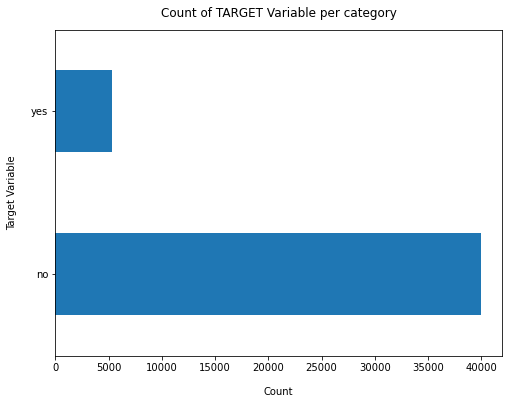

In [60]:
df['y'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [61]:
100*df['y'].value_counts()/len(df['y'])

no     88.30152
yes    11.69848
Name: y, dtype: float64

* Data is highly imbalanced, ratio = 88.30152:11.69848<br>

**Distribution of categorical variable**

In [62]:

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_categories = df[column].nunique()
    print(f"Number of unique categories in '{column}': {unique_categories}")
    print(df[column].value_counts(), "\n")


Number of unique categories in 'job': 12
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

Number of unique categories in 'marital': 3
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

Number of unique categories in 'education': 4
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

Number of unique categories in 'default': 2
no     44396
yes      815
Name: default, dtype: int64 

Number of unique categories in 'housing': 2
yes    25130
no     20081
Name: housing, dtype: int64 

Number of unique categories in 'loan': 2
no     37967
yes     7244
Name: loan, dtype: int64 

Number of unique categories in 'contact': 3
cellular     29285
unknown      13020
telephone  

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


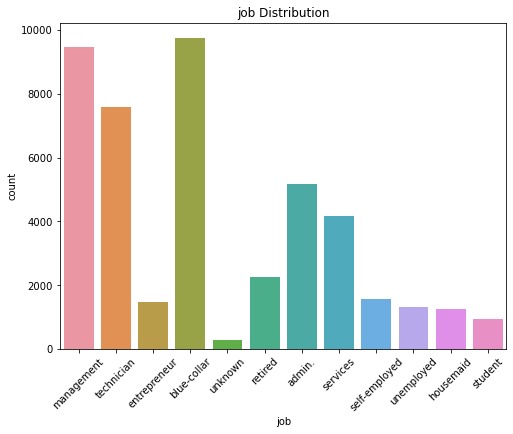

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


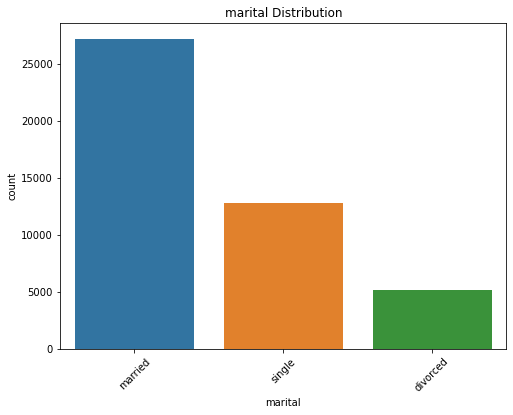

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


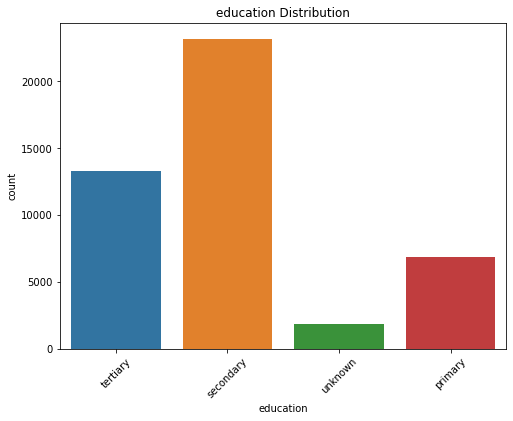

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


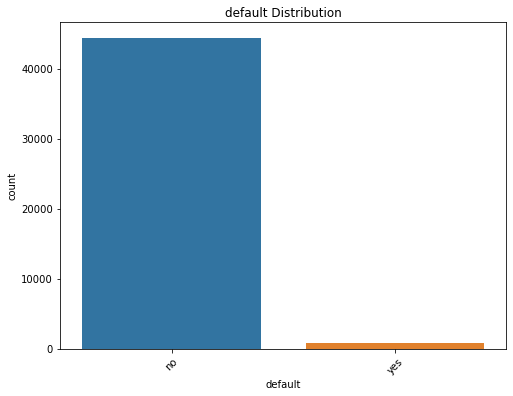

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


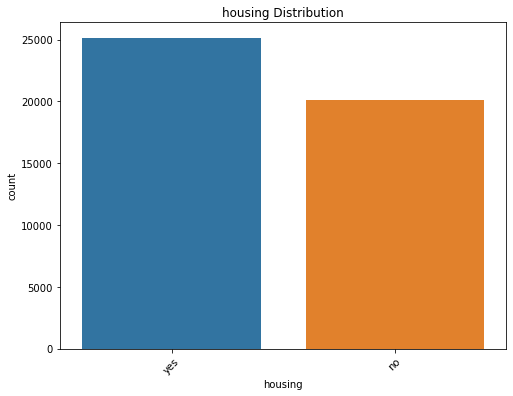

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


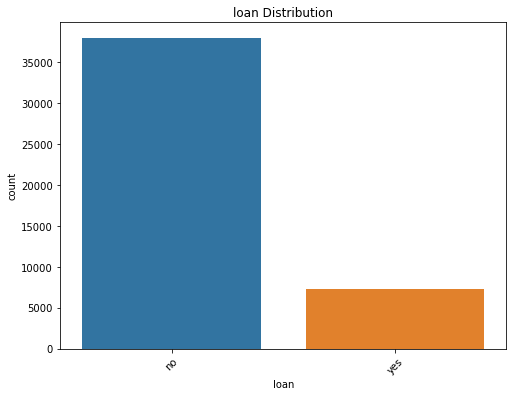

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


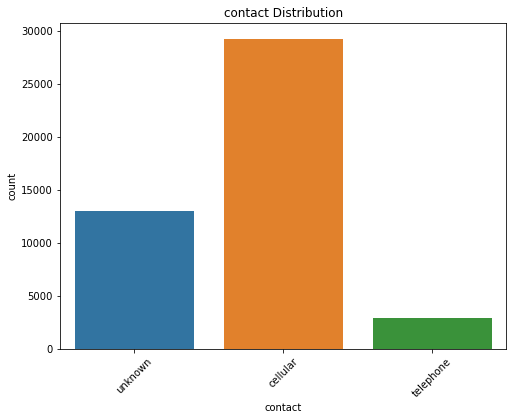

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


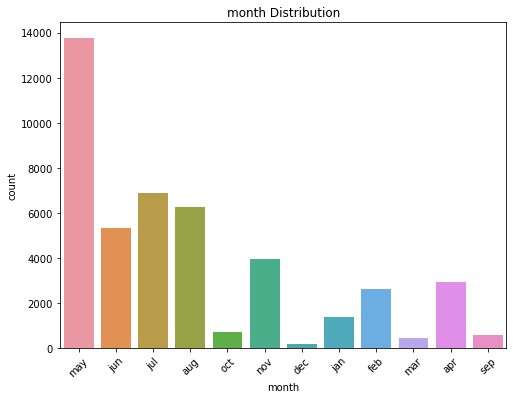

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


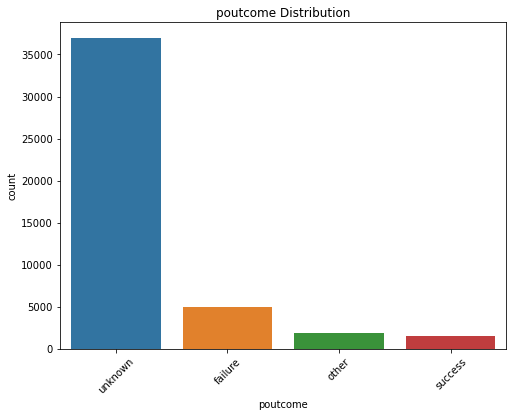

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


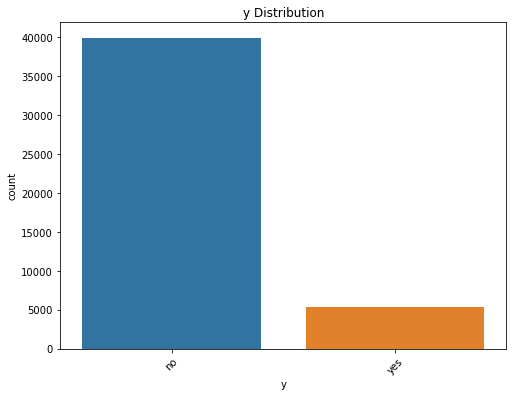

In [63]:

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(df[column])
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
    plt.show()


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


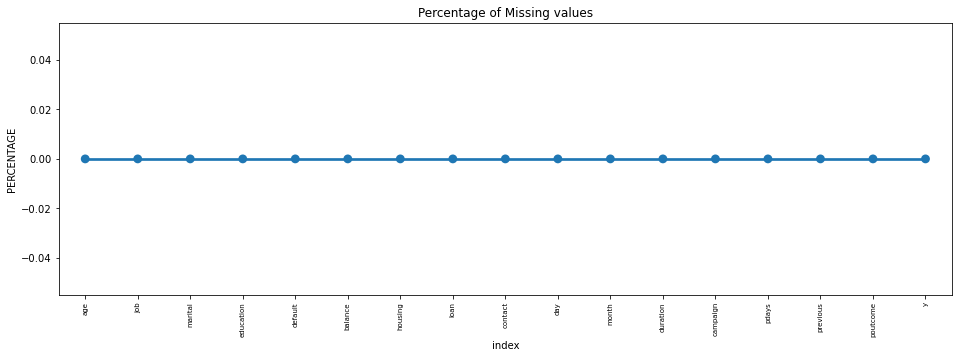

In [64]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

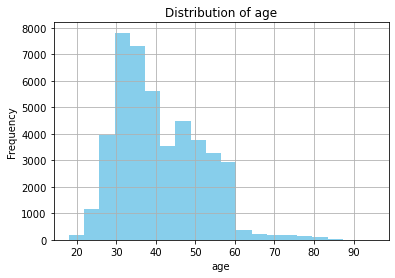

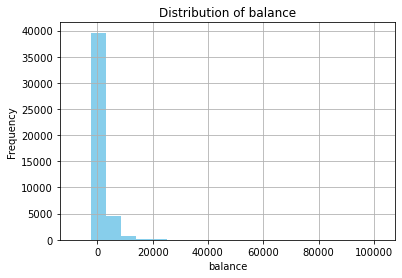

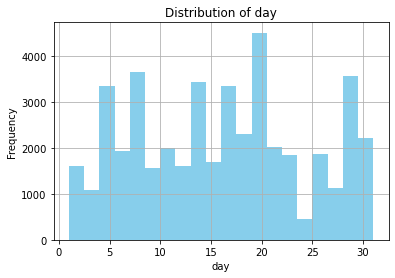

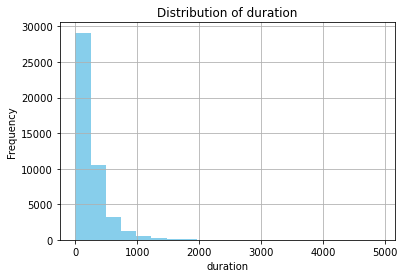

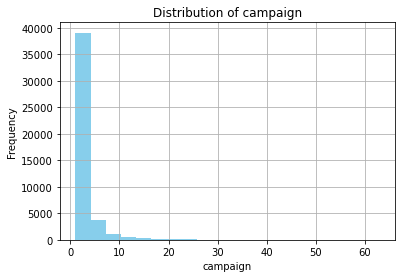

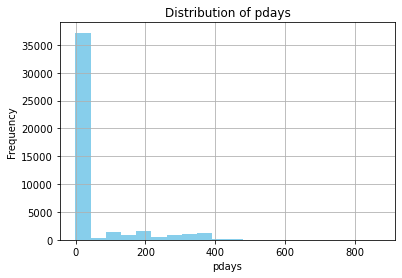

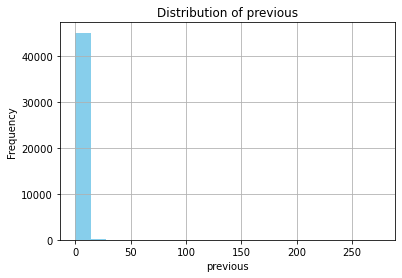

In [65]:
numerical_columns = df.select_dtypes(include=['int64'])

# Plotting histograms for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


<Figure size 864x576 with 0 Axes>

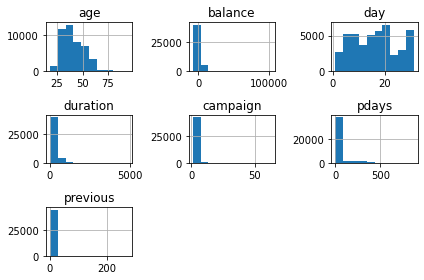

In [66]:
plt.figure(figsize=(12, 8))
df.hist()
plt.tight_layout()
plt.show()


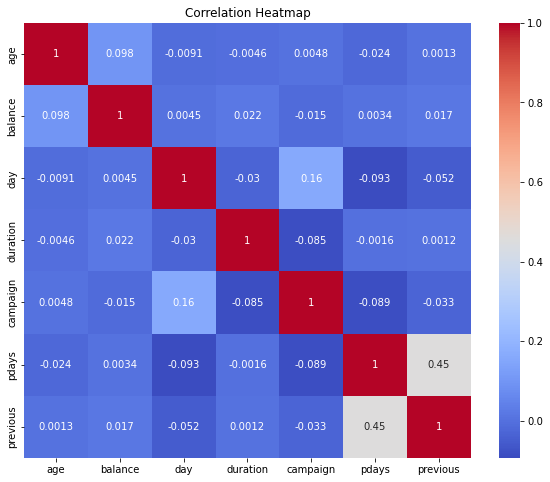

In [67]:
# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [115]:
age_labels = ["{0} - {1}".format(i, i + 9) for i in range(10, 100, 10)]

df['age_group'] = pd.cut(df['age'], range(10, 110, 10), right=False, labels=age_labels)



In [116]:
age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)

10 - 19       47
20 - 29     5226
30 - 39    18089
40 - 49    11655
50 - 59     8410
60 - 69     1230
70 - 79      424
80 - 89      121
90 - 99        9
Name: age_group, dtype: int64


**Univariate Analysis**

In [70]:
categorical_variables = ['job', 'marital', 'education', 'contact', 'poutcome', 'age_group']

In [71]:

# Value counts for categorical variables based on 'y'
for column in categorical_variables:
    print(df.groupby(['y', column]).size())


y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

<Figure size 432x288 with 0 Axes>

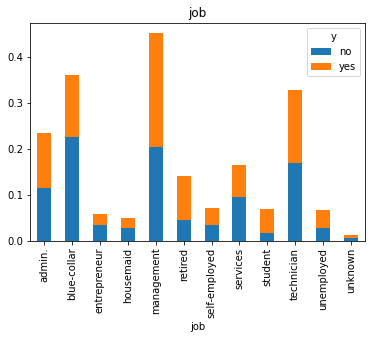

<Figure size 432x288 with 0 Axes>

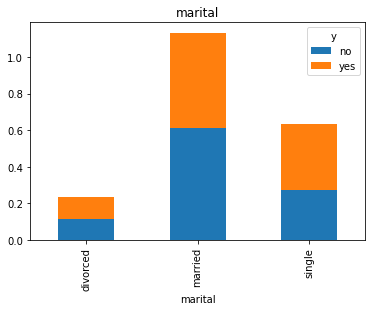

<Figure size 432x288 with 0 Axes>

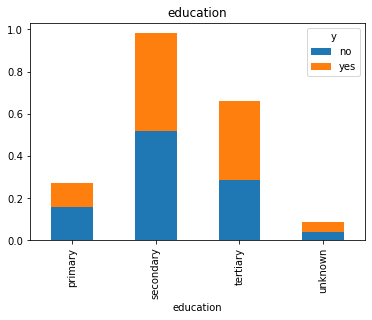

<Figure size 432x288 with 0 Axes>

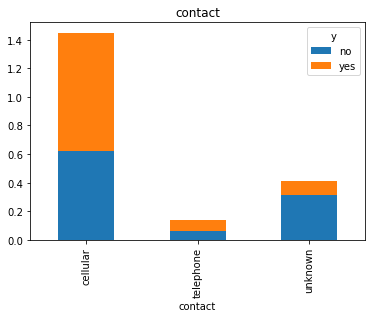

<Figure size 432x288 with 0 Axes>

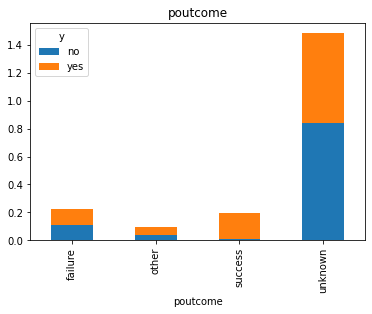

<Figure size 432x288 with 0 Axes>

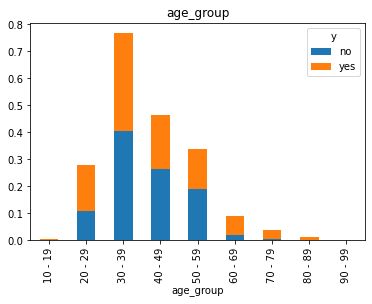

In [73]:
# Bar plots for categorical variables including 'age_group' with 'y' as the differentiating factor
for column in categorical_variables:
    plt.figure()
    (df.groupby([column, 'y']).size() / df.groupby('y').size()).unstack().plot(kind='bar', stacked=True)
    plt.title(column)
    plt.show()


**Job:
Blue-collar workers have the highest count for not subscribing to a term deposit (9024).
Management positions have the highest count for subscribing to a term deposit (1301).**

**Marital Status:
The majority of married individuals didn't subscribe to a term deposit (24459).
However, within the 'yes' category, married individuals also constitute the largest count (2755).**

**Education:
Those with a secondary education have the highest count of not subscribing to a term deposit (20752).
In the 'yes' category, those with tertiary education have the highest count of subscribing (1996).**

**Contact:
Most individuals were contacted via cellular communication and did not subscribe to a term deposit (24916).
Individuals contacted via cellular communication also have the highest count in the 'yes' category (4369).**

**Previous Campaign Outcome (poutcome):
The 'unknown' category has the highest count of not subscribing to a term deposit (33573), showing a lack of information regarding the previous campaign's outcome.
However, among those with a known outcome, the count is higher for those who subscribed upon a successful previous campaign.**

**Age Groups:
In the 'no' category, individuals in the age group '30 - 39' have the highest count of not subscribing (16176).
In the 'yes' category, individuals in the age group '30 - 39' have the highest count of subscribing (1913).**

In [95]:
df['y'].value_counts()


0    39922
1     5289
Name: y, dtype: int64

In [94]:
df['y'] = np.where(df.y == 'yes',1,0)

In [96]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,poutcome_unknown,age_group_10 - 19,age_group_20 - 29,age_group_30 - 39,age_group_40 - 49,age_group_50 - 59,age_group_60 - 69,age_group_70 - 79,age_group_80 - 89,age_group_90 - 99
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [97]:
df_dummies.shape

(45211, 61)

In [98]:
df_dummies['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [99]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int32
 8   job_admin.           45211 non-null  uint8
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

<AxesSubplot:>

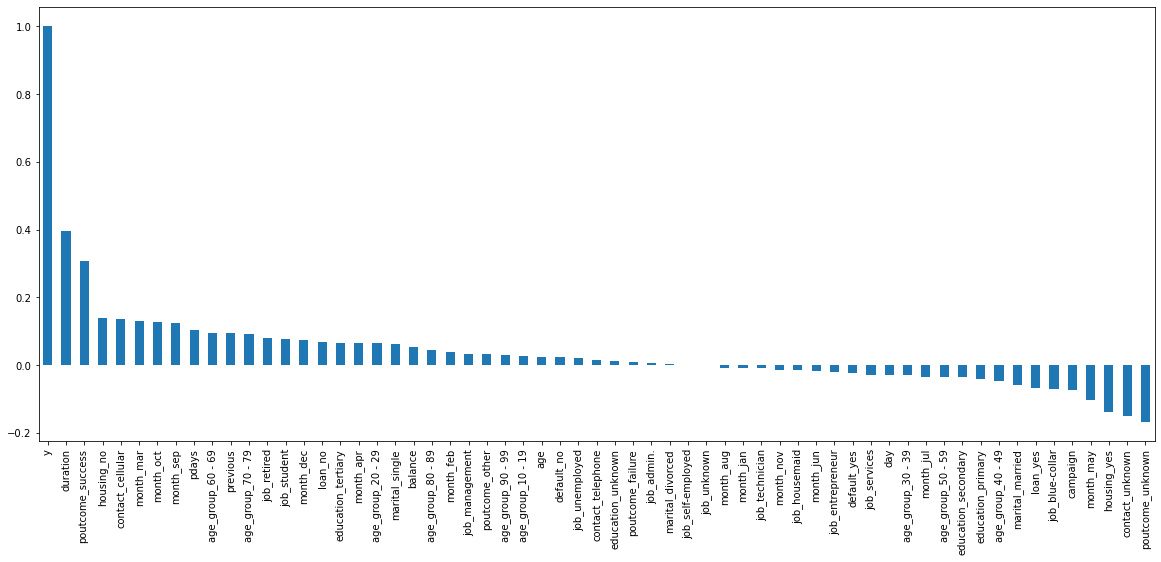

In [105]:
plt.figure(figsize=(20,8))
df_dummies.corr()['y'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

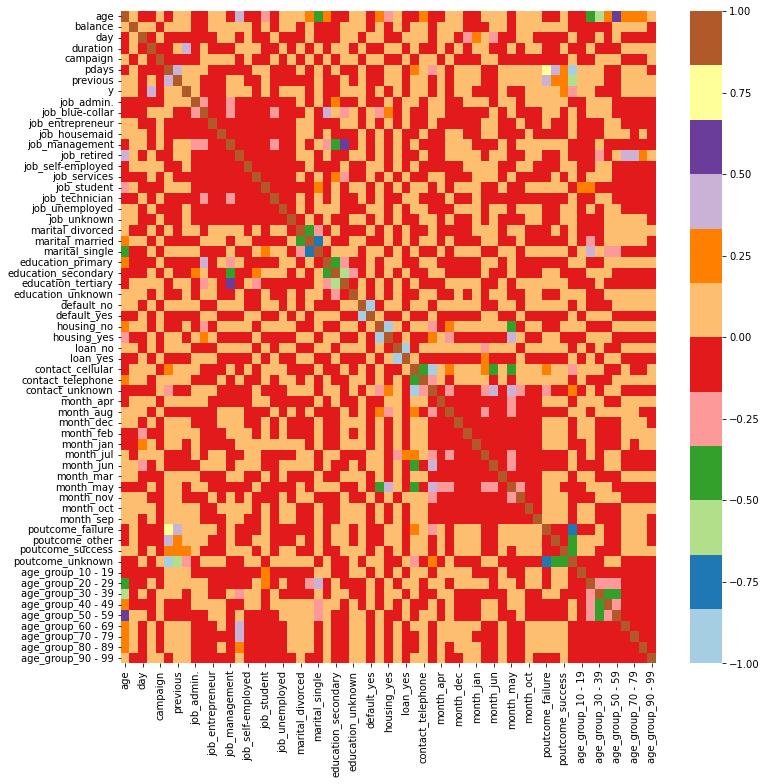

In [100]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  object  
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  y          45211 non-null  int32   
 17  age_group  45211 non-null  category
dtypes: category(1), int32(1), int64(7), object(9)
memory usage: 5.7+ M

In [107]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

**Bivariate Analysis**

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


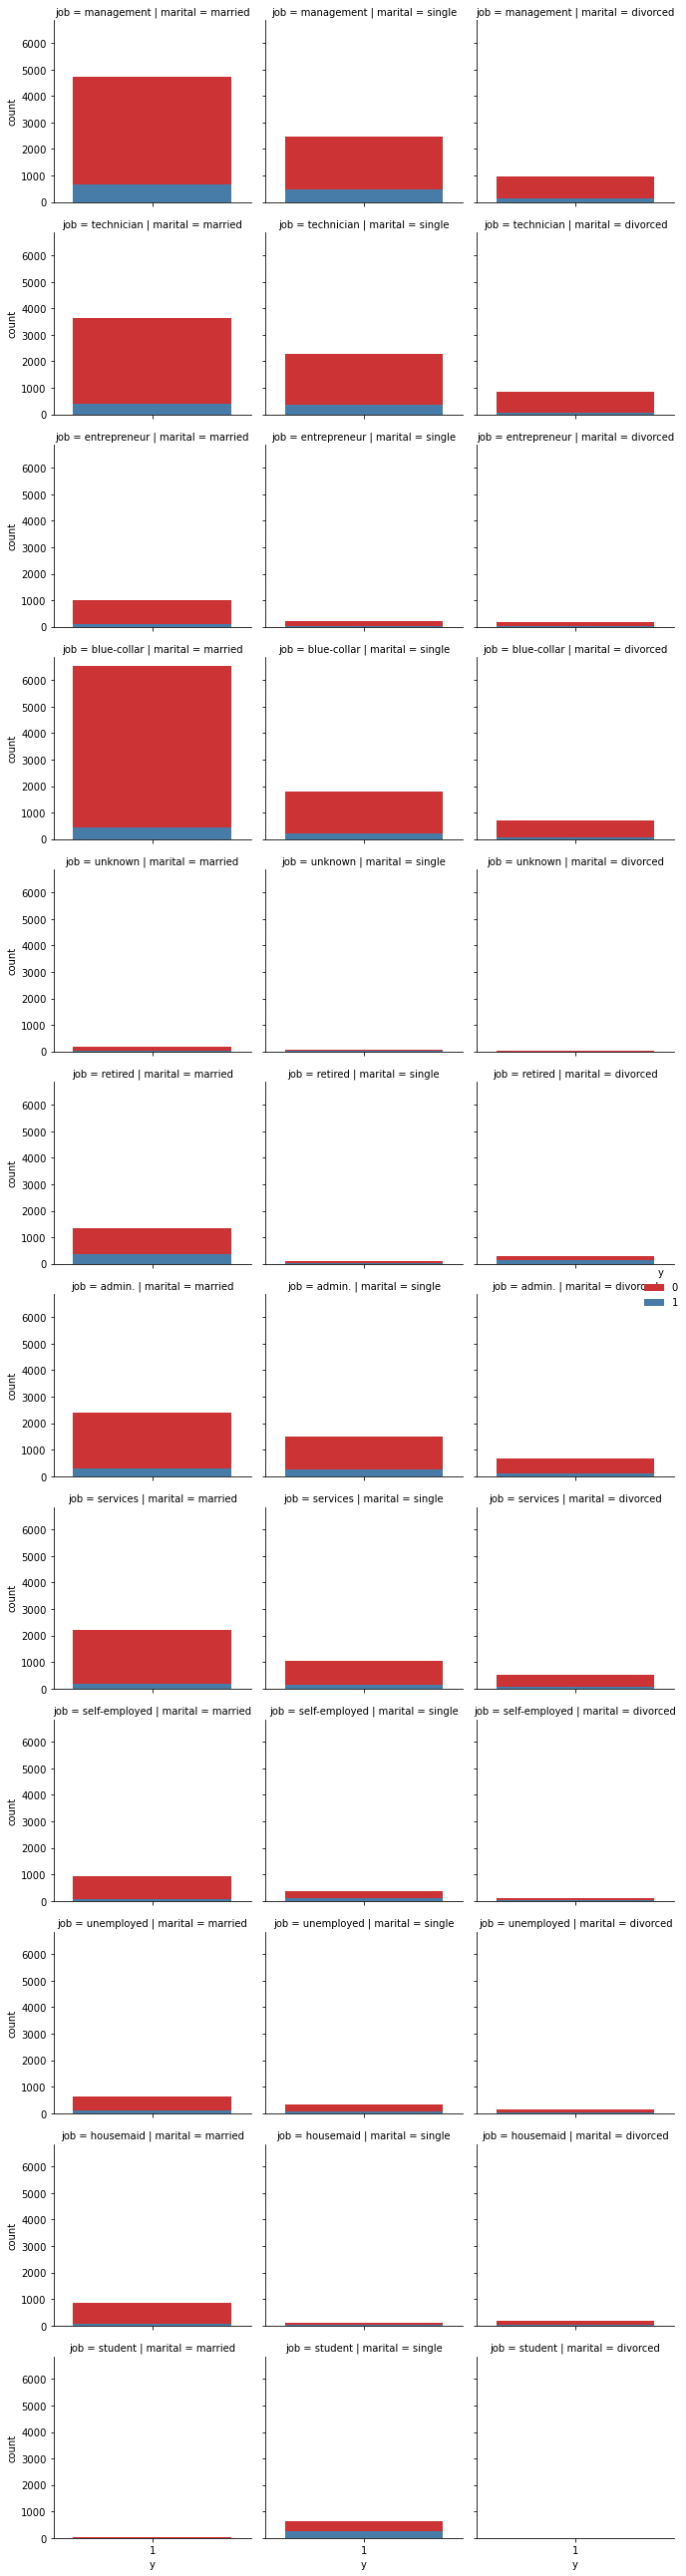

In [104]:
categorical_cols = ['marital', 'job'] 
target_col = 'y' 

# Creating a FacetGrid
g = sns.FacetGrid(df, col=categorical_cols[0], row=categorical_cols[1], hue=target_col, palette="Set1")
g.map(sns.countplot, target_col)
g.add_legend(title=target_col)
plt.tight_layout()
plt.show()


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


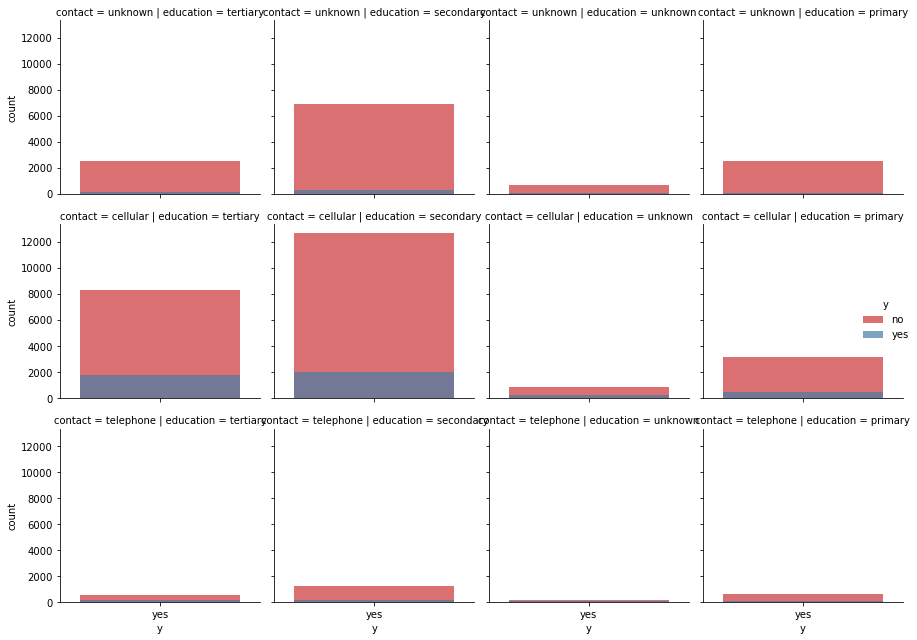

In [118]:

# Sample column names, replace these with your actual column names
categorical_cols = ['education', 'contact']  # Add more categorical columns here
target_col = 'y'  # Replace with your target column name

# Creating a FacetGrid for additional categorical columns
g = sns.FacetGrid(df, col=categorical_cols[0], row=categorical_cols[1], hue=target_col, palette="Set1")
g.map(sns.countplot, target_col, alpha=0.7)
g.add_legend(title=target_col)
plt.tight_layout()
plt.show()


In [132]:

# Value counts for categorical variables based on 'y'
for column in categorical_variables:
    print(df.groupby(['y', column]).size())


y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

In [135]:
new_df1_target0=df.loc[df["y"]=='no']
new_df1_target1=df.loc[df["y"]=='yes']

In [136]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

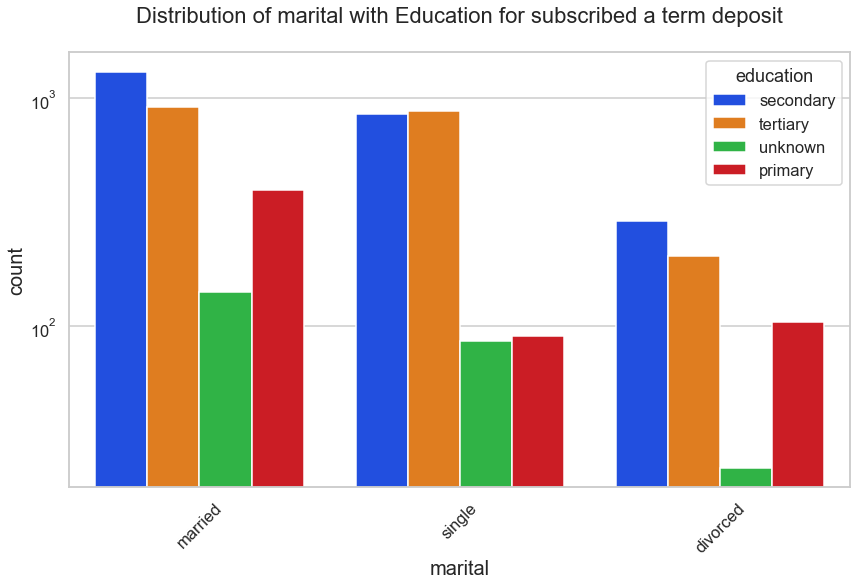

In [138]:
uniplot(new_df1_target1, col='marital', title='Distribution of marital with Education for subscribed a term deposit', hue='education')


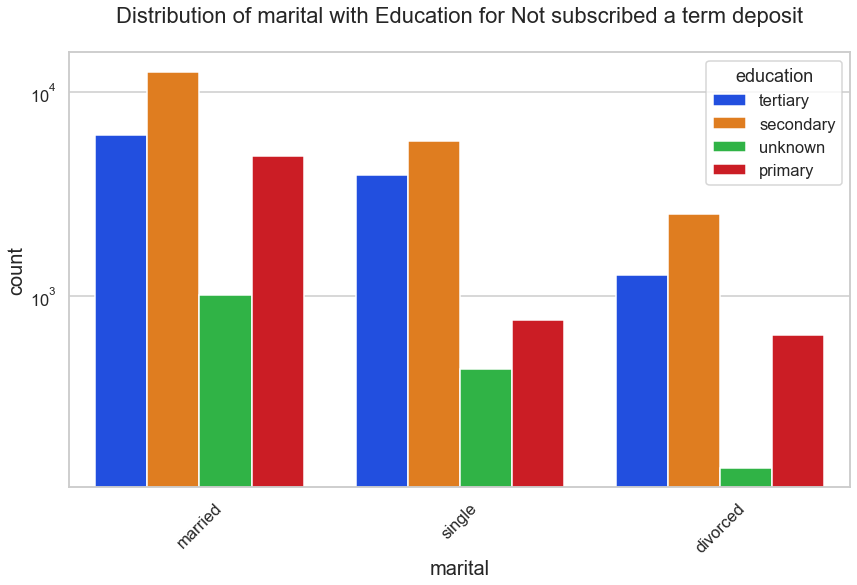

In [141]:
uniplot(new_df1_target0, col='marital', title='Distribution of marital with Education for Not subscribed a term deposit', hue='education')


In [ ]:
#df_dummies.to_csv('Bank_Update.csv', index=False)
